<a href="https://colab.research.google.com/github/rtajeong/M4_2025/blob/main/lab_57_tensorflow_2_0_rev9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow 2.0
- Eager execution mode: skip all the Graph and Session (now, becomes much like a simple Python code (numpy code).
- Tensors 1.0
  - Graph: relate the nodes you created
  - Session:class for performing computation on a graph

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [ ]:
tf.__version__

'2.19.0'

## Tensors
- A tf.Tensor is an object that represents a multidimensional array of elements.
- A tf.Tensor has the following properties:
  - a single data type (float32, int32, or string, for example)
  - a shape
- two primary types:
  - constant: Tensor (값이 불변, 연산에 사용되면 새로운 Tensor 생성, e.g. y=x+1)
  - Variable: Tensor 의 특별한 형태로 값의 변경이 가능한 객체 (주로 parameter)

- Tensor (tf.constant, 연산 결과 등)
  - 불변(immutable): 한 번 생성되면 내부 값을 직접 수정할 수 없음.
  - 연산을 하면 새로운 텐서가 만들어질 뿐, 기존 텐서가 바뀌지 않음.
  - 예: x = tf.constant([1,2,3]); y = x + 1 → y는 새로운 텐서, x는 그대로.
- Variable (tf.Variable)
  - 가변(mutable): 학습 과정에서 값이 계속 업데이트되어야 하므로 변경 가능.
  - assign() 메서드를 통해 값을 갱신할 수 있음.

- TensorFlow에서 대부분의 연산은 새로운 Tensor를 생성한다. 반면에 Variable은 오직 tf.Variable()을 통해서만 만들어지고, 그 이후에는 assign() 같은 메서드로 값을 갱신할 수 있다.

In [ ]:
# Compute some values using a Tensor
c = tf.constant([[1.0, 2.0],
                 [3.0, 4.0]])
d = tf.constant([[1.0, 1.0],
                 [0.0, 1.0]])
e = tf.matmul(c, d)
print(e, c@d)     # matrix multiplication


tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


In [ ]:
type(e)    # eager tensor gives you access to a useful function, numpy

tensorflow.python.framework.ops.EagerTensor

- EagerTensor: Tensor is a EagerTensor by default in tf 2.x (objects, and operations are evaluated immediately.)

In [ ]:
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 3.],
       [3., 7.]], dtype=float32)>

In [ ]:
e.numpy()

array([[1., 3.],
       [3., 7.]], dtype=float32)

In [ ]:
# constructing a tensor from a numpy array or pandas dataframe

a = np.array([1, 2, 3])
b = tf.constant(a)  # tf.Tensor (immutable)
c = tf.Variable(a)  # tf.Variable (mutable)
a, b, c

(array([1, 2, 3]),
 <tf.Tensor: shape=(3,), dtype=int64, numpy=array([1, 2, 3])>,
 <tf.Variable 'Variable:0' shape=(3,) dtype=int64, numpy=array([1, 2, 3])>)

In [ ]:
a[0] = 4
a, b, c

(array([4, 2, 3]),
 <tf.Tensor: shape=(3,), dtype=int64, numpy=array([1, 2, 3])>,
 <tf.Variable 'Variable:0' shape=(3,) dtype=int64, numpy=array([1, 2, 3])>)

In [ ]:
try:
    c[1] = 7
except:
    print ("Error: use assign() method.")

Error: use assign() method.


In [ ]:
c[1].assign(7); c

<tf.Variable 'Variable:0' shape=(3,) dtype=int64, numpy=array([1, 7, 3])>

In [ ]:
b, c

(<tf.Tensor: shape=(3,), dtype=int64, numpy=array([1, 2, 3])>,
 <tf.Variable 'Variable:0' shape=(3,) dtype=int64, numpy=array([1, 7, 3])>)

In [ ]:
try:
    b[1].assign(9)
except:
    print ("Error: immutable.")

Error: immutable.


- direct assignment (=) is allowd on tf.Variable, but it create a new object (not allowd to update the tensor by direct assignment)

In [ ]:
W = tf.Variable(1.0)
print(id(W))
W = W - 0.1 * W  # allowed, but it creates a new tensor, it doesn't directly modify W
W, id(W)

134112515154976


(<tf.Tensor: shape=(), dtype=float32, numpy=0.8999999761581421>,
 134112514648272)

In [ ]:
W = tf.Variable(1.0)
# W -= 0.1*W       # not allowed to directly change the content by '='
W.assign_sub(0.1*W) # Use assign_sub for in-place modification

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.8999999761581421>

In [ ]:
W = tf.Variable(1.0)
print(id(W))
W.assign_sub(0.1*W)   # in-place operation (recommended): w = w - 0.1*w
W, id(W)

134112515157952


(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.8999999761581421>,
 134112515157952)

- tensorflow tensors and numpy array
  - numpy uses 64-bits (int64 and float64)
  - tf uses 32-bits (tf.int32 and tf.float32)

In [ ]:
n1 = np.array([[1.,2.], [3.,4.]])
n2 = np.array([[1,2],[3,4]])
n1.dtype, n2.dtype     # numpy uses 64 bit in default

(dtype('float64'), dtype('int64'))

In [ ]:
t1 = tf.constant([[1.,2.],[3.,4.]])
t2 = tf.constant([[1,2],[3,4]])
t1.dtype, t2.dtype     # tensor uses 32 bit

(tf.float32, tf.int32)

In [ ]:
n1-1, n2-1

(array([[0., 1.],
        [2., 3.]]),
 array([[0, 1],
        [2, 3]]))

In [ ]:
t1-1, t2-1

(<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0., 1.],
        [2., 3.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[0, 1],
        [2, 3]], dtype=int32)>)

In [ ]:
n1 + t1    # automatically convert numpy float to a tf.loat before addition

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 4.],
       [6., 8.]], dtype=float32)>

In [ ]:
t1[0,1]

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

- tf.constant() is immutable
- tf.Variable() is mutable. Use assign() or assign_add() instead of direct assignment(=)

In [ ]:
# tf.Variable is mutable.
t2 = tf.Variable(n1)
t2

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float64, numpy=
array([[1., 2.],
       [3., 4.]])>

In [ ]:
try:
    t2[0,0] = 7
except:
    print("Error: 'ResourceVariable' object does not support item assignment")

Error: 'ResourceVariable' object does not support item assignment


In [ ]:
# can be modified in place with assign(), assign_sub(), assign_add()
t2[0,0].assign(7)
t2

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float64, numpy=
array([[7., 2.],
       [3., 4.]])>

In [ ]:
t2.assign(2 * t2)
t2

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float64, numpy=
array([[14.,  4.],
       [ 6.,  8.]])>

- operation between different data types

In [ ]:
print(tf.constant(2.7) + 7)              # tensor (op) numbers -> automatic conversion
print(tf.constant(2.7) + 7.0)
print(tf.constant(2.7) + np.array(7.0))  # tensor (op) numpy -> automatic conversion
print(tf.constant(2.7) + np.array(7))

tf.Tensor(9.7, shape=(), dtype=float32)
tf.Tensor(9.7, shape=(), dtype=float32)
tf.Tensor(9.7, shape=(), dtype=float32)
tf.Tensor(9.7, shape=(), dtype=float32)


In [ ]:
try:
    tf.constant(2.7) + tf.constant(5)    # tensors -> no automatic conversion !
except:
    print("error")

error


In [ ]:
tf.constant(2.7) + tf.cast(tf.constant(5), dtype=tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=7.699999809265137>

- When working with both TensorFlow tensors and NumPy arrays, TensorFlow will attempt to handle data type conversions automatically.
- But, operations between two TensorFlow tensors, TensorFlow is more strict about ensuring that the data types match.
- to convert data type, use tf.cast().

In [ ]:
n = np.array(7.)
print(tf.constant(n).dtype, tf.constant(2.7).dtype)
try:
    tf.constant(n) + tf.constant(2.7)      # causing data type mismatch error !
except:
    print("error")

<dtype: 'float64'> <dtype: 'float32'>
error


In [ ]:
tf.cast(tf.constant(n), tf.float32) + tf.constant(2.7)

<tf.Tensor: shape=(), dtype=float32, numpy=9.699999809265137>

In [ ]:
n1 = np.array([[1.,2.],
               [3.,4.]])
t3, t4  = tf.constant(n1), tf.constant([[2.3, 1.2], [2.1, 1.1]])
t3, t4

(<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
 array([[1., 2.],
        [3., 4.]])>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[2.3, 1.2],
        [2.1, 1.1]], dtype=float32)>)

In [ ]:
try:
    t3 + t4
except:
    print("Error: double can not be added with float. use tf.cast()")

Error: double can not be added with float. use tf.cast()


In [ ]:
#  print(t3 + t4)   # error
tf.cast(t3, tf.float32) + t4

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[3.3, 3.2],
       [5.1, 5.1]], dtype=float32)>

## Linear Regression with Numpy

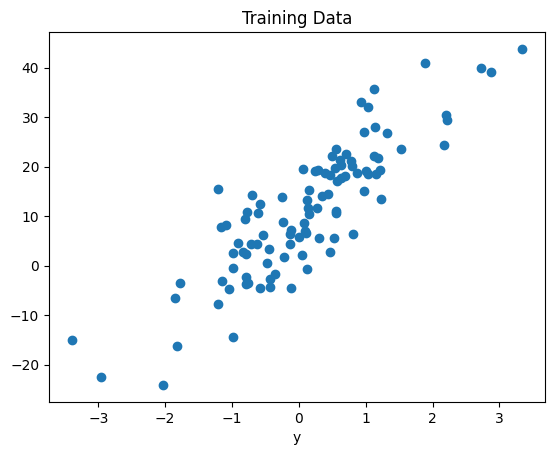

In [ ]:
np.random.seed(17)
n = 100
x = np.random.randn(n)               # batch size
y = x*10 + 10                        # w=10, b=10
y = y + np.random.randn(n) * 7       # add noise

plt.scatter(x, y)
plt.xlabel('x')
plt.xlabel('y')
plt.title("Training Data")
plt.show()

epoch= 199 error= 44.039056119990974 w= 10.253254672242234 b= 9.903642788225548


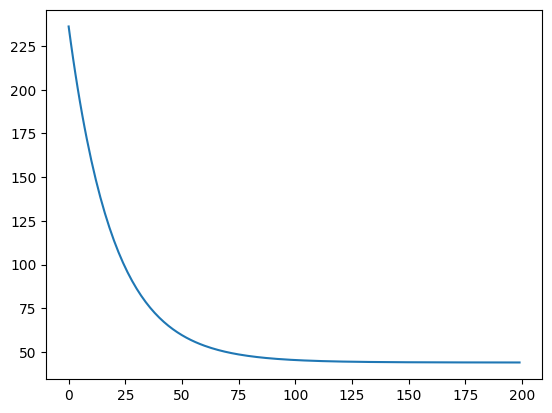

In [ ]:
w=np.random.randn()
b=np.random.randn()

lr = 0.02
n_epoch = 200
lossHistory = []

for epoch in range(n_epoch):
    y_pred = w*x + b
    error = ((y_pred - y)**2).mean()  # MSE

    w = w - lr* ((y_pred - y)*x).mean()
    b = b - lr* (y_pred - y).mean()
    lossHistory.append(error)

print('epoch=', epoch, 'error=', error, 'w=', w, 'b=', b)

plt.plot(lossHistory)

## Linear Regression using Tensorflow 2.0

### Version 1

()
    0|   -2.5451|    0.9159|378.381378
   10|    0.5214|     2.814|242.332443
   20|    2.8591|     4.309|161.778473
   30|    4.6404|     5.489|114.038094
   40|    5.9968|      6.42| 85.714661
   50|    7.0293|     7.157| 68.890579
   60|    7.8145|     7.741| 58.883469
   70|    8.4114|     8.203| 52.921947
   80|    8.8647|     8.571| 49.364365
   90|    9.2087|     8.863| 47.237202
  100|    9.4695|     9.095| 45.962578
  110|    9.6671|      9.28| 45.196949
  120|    9.8165|     9.428| 44.735825
  130|    9.9294|     9.546| 44.457291
  140|   10.0147|      9.64| 44.288502
  150|   10.0789|     9.716| 44.185860
  160|   10.1272|     9.776| 44.123203
  170|   10.1634|     9.825| 44.084805
  180|   10.1906|     9.864| 44.061172
  190|   10.2109|     9.896| 44.046555


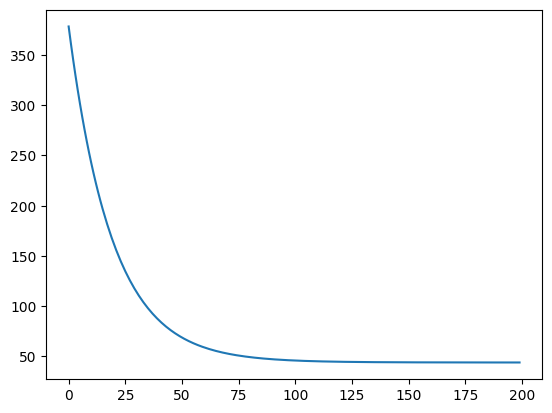

In [ ]:
W = tf.Variable(-2.9)
b = tf.Variable(0.7)
print(W.shape)

learning_rate = 0.02
lossHistory = []

for i in range(200):
    y_pred = W * x + b
    cost = tf.reduce_mean(tf.square(y_pred - y))

    W_grad = tf.reduce_mean((y_pred - y) * x)  # 차원을 줄이는 동작
    b_grad = tf.reduce_mean(y_pred - y)

    # W = W - learning_rate * W_grad
    # b = b - learning_rate * b_grad

    W.assign_sub(learning_rate * W_grad)   # recommended (w = w - .. )
    b.assign_sub(learning_rate * b_grad)

    lossHistory.append(cost)
    if i % 10 == 0:
        print("{:5}|{:10.4f}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(lossHistory)

### Version 2 (using tf.GradientTape())
- tape에 기록한다는 말은, tf.GradientTape() 블록 안에서 일어난 연산 과정(operations)을 일종의 “녹화기”처럼 저장해 둔다는 뜻이다. 값 자체를 저장하는 게 아니라, 어떤 입력에 어떤 함수가 적용되었는지를 기록해 둔다. (미분은 symbolic 연산)
- tape.gradient(y, x)를 호출하면, 테이프는 이 기록을 거꾸로 따라가면서 연쇄 법칙(chain rule)을 적용.

    0|   -2.1902|     1.132|378.381378
   10|    3.1205|     4.474|160.143356
   20|    6.1804|     6.543| 84.576569
   30|    7.9393|     7.829| 58.286949
   40|    8.9474|     8.633| 49.084991
   50|    9.5233|     9.139| 45.839092
   60|    9.8509|     9.459| 44.682995
   70|   10.0364|     9.662| 44.266293
   80|   10.1407|     9.791| 44.113945
   90|   10.1989|     9.874| 44.057316
  100|   10.2310|     9.928| 44.035866
  110|   10.2486|     9.963| 44.027573
  120|   10.2580|     9.986| 44.024296
  130|   10.2630|      10.0| 44.022980
  140|   10.2655|     10.01| 44.022438
  150|   10.2667|     10.02| 44.022202
  160|   10.2672|     10.02| 44.022114
  170|   10.2674|     10.02| 44.022064
  180|   10.2674|     10.03| 44.022049
  190|   10.2674|     10.03| 44.022041


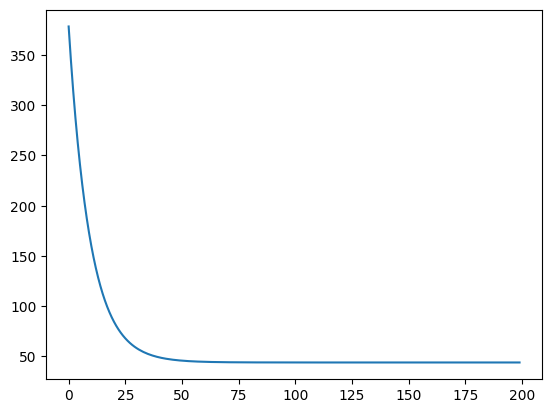

In [ ]:
W = tf.Variable(-2.9)
b = tf.Variable(0.7)

learning_rate = 0.02
lossHistory = []

for i in range(200):
    with tf.GradientTape() as tape:   # 내부에 symbolic 미분 연산이 들어 있음
        y_pred = W * x + b
        cost = tf.reduce_mean(tf.square(y_pred - y))

    W_grad, b_grad = tape.gradient(cost, [W,b])  # dCost/dw, dCost/db

    W.assign_sub(learning_rate * W_grad)   # W is still a Variable.
    b.assign_sub(learning_rate * b_grad)
    #
    # W = W - learning_rate * W_grad
    # b = b - learning_rate * b_grad
    # will cause error (W will be changed from Variable -> Tensor)
    # then, tape.gradient will return None.

    lossHistory.append(cost)
    if i % 10 == 0:
        print("{:5}|{:10.4f}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(lossHistory)

In [ ]:
W_grad, W, cost

(<tf.Tensor: shape=(), dtype=float32, numpy=0.00030037760734558105>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=10.267328262329102>,
 <tf.Tensor: shape=(), dtype=float32, numpy=44.022037506103516>)

### Version 3 (tf.GradientTape() and opt.apply_gradients())
- opt.apply_gradients(): it allows you to explicitly compute gradients and apply them to variables, giving you more control over the process.
  - loss = ...
  - opt = tf.optimizers.Adam()
  - gradients = tape.gradient(loss, variables) \# Compute gradients with respect to variables
  - opt.apply_gradients(zip(gradients, variables))  \# Apply gradients to variables
- opt.minimize(): it combines two steps: computing gradients and applying them to update the variables.
  - loss = ...
  - opt = tf.optimizers.Adam()

  - opt.minimize(loss, var_list=variables)  \# Compute gradients and update variables
  - not recommended.

    0|   -2.4177|     1.758|333.000000
   10|   -0.2788|     7.823|223.048798
   20|    0.0466|      9.87|211.871628
   30|    0.0534|     10.58|210.593781
   40|    0.0284|     10.82|210.436478
   50|    0.0126|     10.91|210.416321
   60|    0.0051|     10.94|210.413696
   70|    0.0020|     10.95|210.413330
   80|    0.0008|     10.96|210.413300
   90|    0.0003|     10.96|210.413300
  100|    0.0001|     10.96|210.413300
  110|    0.0000|     10.96|210.413300
  120|    0.0000|     10.96|210.413254
  130|    0.0000|     10.96|210.413254
  140|    0.0000|     10.96|210.413254
  150|    0.0000|     10.96|210.413269
  160|    0.0000|     10.96|210.413269
  170|    0.0000|     10.96|210.413269
  180|    0.0000|     10.96|210.413269
  190|    0.0000|     10.96|210.413269


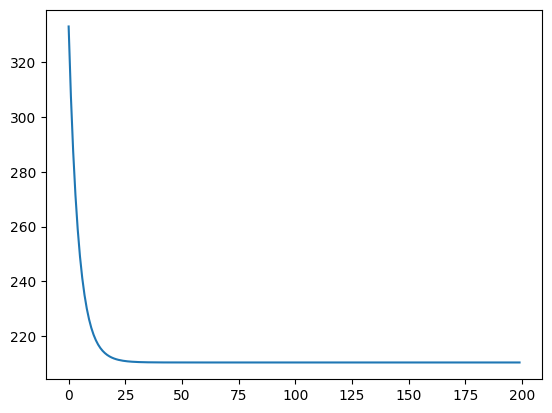

In [ ]:
# customize the training loop

W = tf.Variable(-2.9)
b = tf.Variable(0.7)

learning_rate = 0.05
lossHistory = []

for i in range(200):
    with tf.GradientTape() as tape:
        y_pred = W * x + b
        cost = tf.reduce_mean(tf.square(y_pred - y))

    grads = tape.gradient(cost, [W, b])

    optimizer = tf.optimizers.SGD( learning_rate )
    optimizer.apply_gradients(zip(grads, [W,b]))   # w = w - eta*...

    lossHistory.append(cost)
    if i % 10 == 0:
        print("{:5}|{:10.4f}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(lossHistory)

## Linear Regression with multi-variables

### Version 1

    0|    0.5750|    0.5933|    0.9045|327.358063
   50|    7.8232|    6.6958|     6.882| 35.078014
  100|    9.5265|    9.0240|     8.794|  7.615945
  150|    9.8934|    9.9308|     9.427|  4.554090


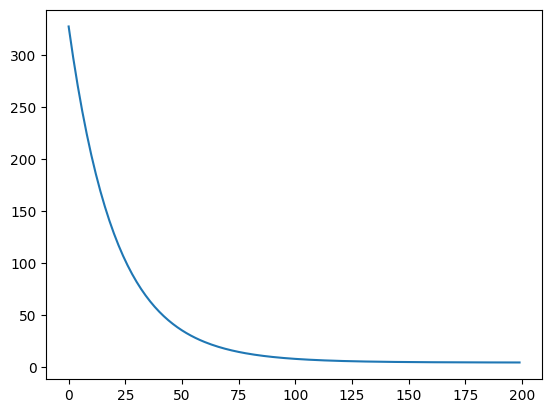

In [ ]:
# two features (x1, x2)
np.random.seed(17)
n = 100
x1 = np.random.randn(n)
x2 = np.random.randn(n)
y = x1*10 + x2*10 + 10
y = y + np.random.randn(n) * 2

w1, w2, b = tf.Variable(0.3), tf.Variable(0.4), tf.Variable(0.7)
learning_rate = 0.01
lossHistory = []

for i in range(200):
    with tf.GradientTape() as tape:
        y_pred = x1 * w1 + x2 * w2 + b
        cost = tf.reduce_mean(tf.square(y_pred - y))

    grads = tape.gradient(cost, [w1, w2, b])

    optimizer = tf.optimizers.SGD( learning_rate )
    optimizer.apply_gradients(zip(grads, [w1, w2, b]))

    lossHistory.append(cost)
    if i % 50 == 0:
        print("{:5}|{:10.4f}|{:10.4f}|{:10.4}|{:10.6f}".format(i, w1.numpy(), w2.numpy(), b.numpy(), cost))

plt.plot(lossHistory)

### Version 2 (using Matrix form)

(100, 2) (100, 1) (2, 1) (1,)
0 [[ 0.7 -1. ]] [0.8] 334.50876
50 [[7.15 6.15]] [6.84] 40.340042
100 [[9.24 8.6 ]] [8.78] 8.202363
150 [[9.92 9.43]] [9.41] 4.681614


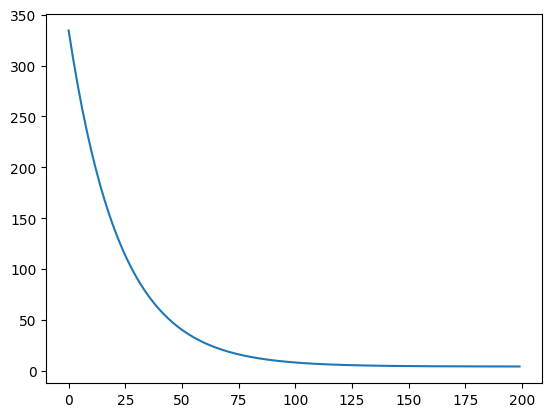

In [ ]:
# matrix form
np.random.seed(17)
n = 100
X = np.random.randn(n,2).astype('float32')
y = X[:,0]*10 + X[:,1]*10 + 10
y = y + np.random.randn(n) * 2
y = y.reshape(-1,1)

W = tf.Variable(tf.random.normal([2,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

print(X.shape, y.shape, W.shape, b.shape)

learning_rate = 0.01
lossHistory = []

for i in range(200):
    with tf.GradientTape() as tape:
        y_pred = tf.matmul(X, W) + b
        cost = tf.reduce_mean(tf.square(y_pred - y))

    grads = tape.gradient(cost, [W, b])

    optimizer = tf.optimizers.SGD( learning_rate )
    optimizer.apply_gradients(zip(grads, [W,b]))

    lossHistory.append(cost)
    if i % 50 == 0:
        print(i, W.numpy().T.round(2), b.numpy().round(2), cost.numpy())

plt.plot(lossHistory)

In [ ]:
W, b

(<tf.Variable 'weight:0' shape=(2, 1) dtype=float32, numpy=
 array([[10.14171 ],
        [ 9.708193]], dtype=float32)>,
 <tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([9.610597], dtype=float32)>)

## Linear regression using keras

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

[array([[10.162458]], dtype=float32), array([10.056843], dtype=float32)]


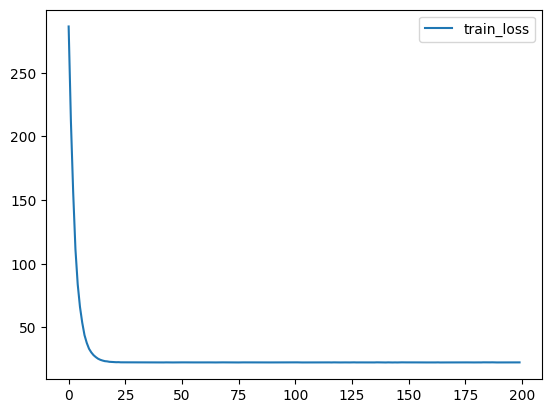

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

np.random.seed(17)
n = 100
x = np.random.randn(n)                # batch size
y = x*10 + 10                         # w=10, b=10 ???
y = y + np.random.randn(n) * 5        # add noise

#---------
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='linear'))
model.summary()

model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')

history = model.fit(x, y, epochs=200, verbose=0, batch_size=16)

print([i.numpy() for i in model.weights])

# history.history.keys()
plt.plot(history.history['loss'], label='train_loss')
plt.legend(loc='best')

In [ ]:
model.weights   # list of Variables  (read and write)

[<Variable path=sequential/dense/kernel, shape=(1, 1), dtype=float32, value=[[10.162458]]>,
 <Variable path=sequential/dense/bias, shape=(1,), dtype=float32, value=[10.056843]>]

In [ ]:
model.weights[0].numpy(), model.weights[1].numpy()

(array([[10.162458]], dtype=float32), array([10.056843], dtype=float32))

In [ ]:
model.get_weights()   # list of numpy arrays (read-only access)

[array([[10.162458]], dtype=float32), array([10.056843], dtype=float32)]

In [ ]:
model.evaluate(x,y)   # loss

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.9759 


22.462318420410156

## Linear Classification by Logistic regression

### using Tensorflow

(300, 2) (300, 1) (2, 1) (1,)
0 [[-0.49668142  0.48102018]] [1.1396767] 2.4511657
20 [[-0.3722563   0.24740033]] [1.1170992] 1.7314805
40 [[-0.22065051  0.07487549]] [1.101765] 1.1924824
60 [[-0.07950565 -0.04734381]] [1.0910665] 0.833985
80 [[ 0.03421719 -0.13187031]] [1.0831294] 0.62668353
100 [[ 0.12234541 -0.19255807]] [1.0767211] 0.5087464
120 [[ 0.19200327 -0.23875421]] [1.0712091] 0.43706137
140 [[ 0.24887776 -0.27571973]] [1.066276] 0.38999116
160 [[ 0.2966928  -0.30642727]] [1.0617474] 0.35701898
180 [[ 0.33784923 -0.33265352]] [1.0575193] 0.3327265


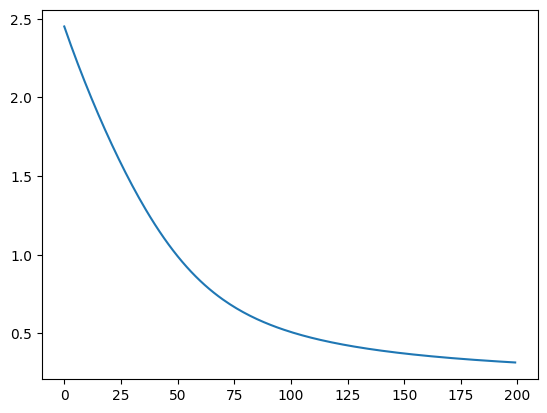

In [ ]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(17)
(X, y) = make_blobs(n_samples=300, n_features=2, centers=2,
                    cluster_std=2.0, random_state=20)
X = X.astype('float32')
y = y.reshape(-1,1)

W = tf.Variable(tf.random.normal([2,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
print(X.shape, y.shape, W.shape, b.shape)

learning_rate = 0.005
lossHistory = []

for i in range(200):
    with tf.GradientTape() as tape:
        z = tf.matmul(X, W) + b
        y_pred = tf.math.divide(1., 1. + tf.exp(-z))  # sigmoid
        y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
        loss = -tf.reduce_mean(y * tf.math.log(y_pred) + (1 - y) * tf.math.log(1 - y_pred))   # CE

    grads = tape.gradient(loss, [W, b])

    optimizer = tf.optimizers.SGD( learning_rate )
    optimizer.apply_gradients(zip(grads, [W, b]))

    lossHistory.append(loss)
    if i % 20 == 0:
        print(i, W.numpy().T, b.numpy(), loss.numpy())

plt.plot(lossHistory)

[]

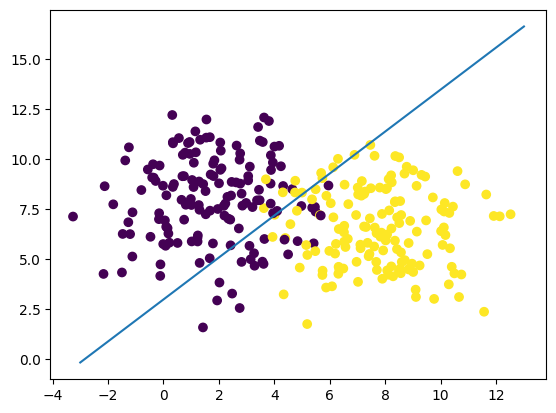

In [ ]:
plt.scatter(X[:,0], X[:,1],c=y)
aa, bb, cc = W[0,0], W[1,0], b
xx = np.linspace(-3, 13, 100)
plt.plot (xx, -aa/bb * xx - cc/bb)
plt.plot()

### Version 2 (Tensorflow, by batches)

<tf.Variable 'weight:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.5758057],
       [-0.546001 ]], dtype=float32)> <tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([-0.46372768], dtype=float32)>
step:  0 [[ 0.63083816 -0.4890544 ]] [-0.45641762] 0.24596435
step:  5 [[ 0.7268155 -0.4134032]] [-0.4483814] 0.18480517
step:  10 [[ 0.76069325 -0.41743043]] [-0.45101994] 0.16301268
step:  15 [[ 0.7854797 -0.4302913]] [-0.45492697] 0.19080813
step:  20 [[ 0.8069742  -0.44396994]] [-0.4590369] 0.13935585
step:  25 [[ 0.8266138  -0.45694774]] [-0.46314287] 0.09665863
step:  30 [[ 0.8453003  -0.46818358]] [-0.46709818] 0.1330429
step:  35 [[ 0.8630113  -0.47816718]] [-0.47095412] 0.20227368
step:  40 [[ 0.8793531  -0.48778412]] [-0.4748223] 0.13595313
step:  45 [[ 0.8942312  -0.49752727]] [-0.47875023] 0.16354771


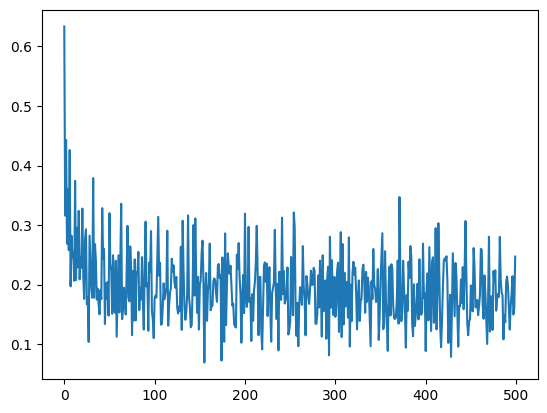

In [ ]:
(X, y) = make_blobs(n_samples=320, n_features=2, centers=2,
                    cluster_std=2.0, random_state=20)
X, y = X.astype('float32'), y.reshape(-1,1).astype('float32')
dataset = tf.data.Dataset.from_tensor_slices((X, y)).shuffle(100).batch(32)

W = tf.Variable(tf.random.normal([2,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
print (W, b)

num_epochs = 50
learning_rate = 0.005

def logistic_regression(X):
    z = tf.matmul(X, W) + b
    return 1. / (1. + tf.exp(-z))

def loss_fn(y_pred, Y):
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    return -tf.reduce_mean(Y * tf.math.log(y_pred) + (1 - Y) * tf.math.log(1 - y_pred))

lossHistory = []
for step in range(num_epochs):
    for batch_x, batch_y in iter(dataset):
        with tf.GradientTape() as tape:
            y_pred = logistic_regression(batch_x)
            loss = loss_fn(y_pred, batch_y)

        grads = tape.gradient(loss, [W, b])
        optimizer = tf.optimizers.SGD( learning_rate )
        optimizer.apply_gradients(zip(grads, [W,b]))
        lossHistory.append(loss)
    if step%5 == 0:
        print("step: ", step, W.numpy().T, b.numpy(), loss.numpy())

plt.plot(lossHistory)

[]

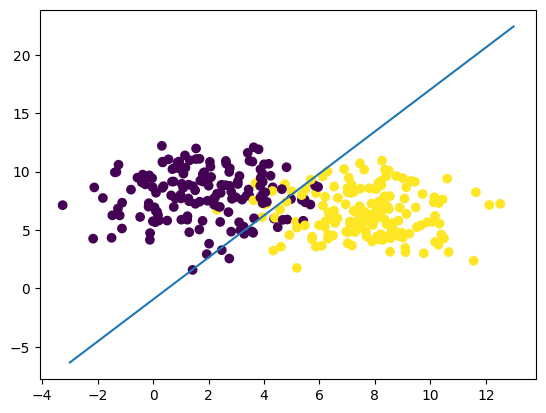

In [ ]:
plt.scatter(X[:,0], X[:,1],c=y)
aa, bb, cc = W[0,0], W[1,0], b
xx = np.linspace(-3, 13, 100)
plt.plot (xx, -aa/bb * xx - cc/bb)
plt.plot()

## Logistic regression (with Keras)

In [ ]:
from sklearn.datasets import make_blobs

np.random.seed(17)
N = 320
(X, y) = make_blobs(n_samples=N, n_features=2, centers=2,
                    cluster_std=2.0, random_state=20)

model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.summary()

model.compile(optimizer=SGD(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X, y, epochs=50, batch_size=32, verbose=1)

print([i.numpy() for i in model.weights])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4649 - loss: 8.0382   
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4860 - loss: 5.3050 
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5255 - loss: 2.4874 
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5682 - loss: 0.7824 
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8915 - loss: 0.4013 
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8954 - loss: 0.3618 
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9065 - loss: 0.3248 
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8953 - loss: 0.3194 
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8976 - loss: 0.3095 
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9112 - loss: 0.2740 
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8921 - loss: 0.2781 
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

In [ ]:
model.weights

[<Variable path=sequential_1/dense_1/kernel, shape=(2, 1), dtype=float32, value=[[ 0.9022902]
  [-0.5733945]]>,
 <Variable path=sequential_1/dense_1/bias, shape=(1,), dtype=float32, value=[0.06957678]>]

In [ ]:
model.weights[0].shape, model.weights[1].shape

(TensorShape([2, 1]), TensorShape([1]))

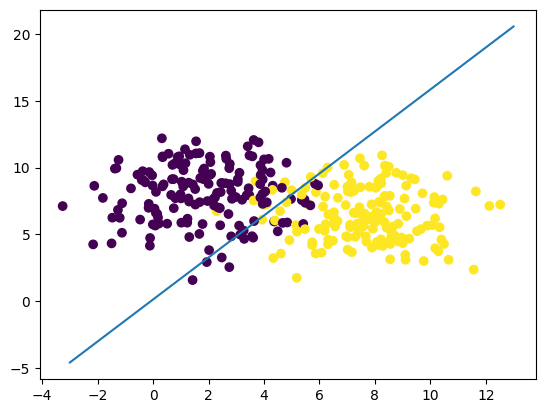

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)
w1, w2 = model.weights[0][0,0], model.weights[0][1,0]
b = model.weights[1]
xx = np.linspace(-3, 13, 100)
yy = -w1/w2 * xx - b/w2
plt.plot(xx, yy)

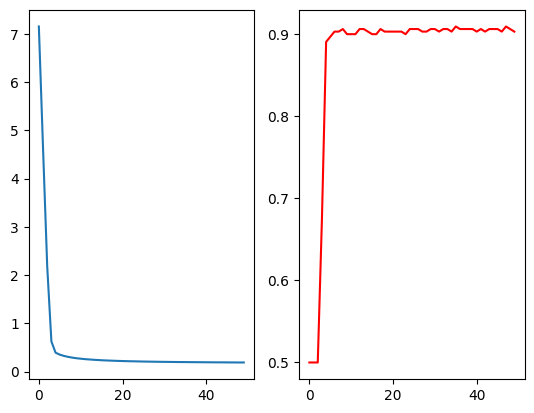

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='loss')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='accuracy', c='r')
plt.show()

# Pytorch
- PyTorch에서는 Tensor가 곧 기본 데이터 구조이며, TensorFlow처럼 별도의 Variable 객체를 만들 필요가 없다.
- 예전에는 Variable이 있었지만 지금은 Tensor에 자동 미분 기능이 통합되어 있어서, 값 갱신과 연산 모두 Tensor로 처리한다.

- TensorFlow and Pytorch
  - TensorFlow:
    - tf.Tensor는 불변(immutable)
    - 학습 가능한 파라미터는 tf.Variable로 따로 생성해야 하며, assign()으로 값 갱신.
  - PyTorch:
    - 모든 것이 torch.Tensor로 표현됨.
    - requires_grad=True 옵션을 주면 자동 미분 추적이 활성화되어 학습 가능한 파라미터로 사용 가능.
    - 값 갱신은 in-place 연산(tensor.add_(), tensor.mul_())이나 optimizer가 직접 수행.

In [ ]:
import torch

w = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
w.data = torch.tensor([0.0, 0.0, 0.0])  # 직접 값 변경 가능
w = w + 1
w

tensor([1., 1., 1.], grad_fn=<AddBackward0>)

# Exercise

## Tensorflow 2.0 and Tensorflow.Keras


### 1. Eager execution (no Graph, no Session)
 - direct execution
 - no placeholder(), no gloval_variables_initializer()

In [ ]:
a = tf.constant(10)
b = tf.constant(20)
c = a + b
print(c, c.numpy())

tf.Tensor(30, shape=(), dtype=int32) 30


In [ ]:
w = tf.Variable(tf.random.normal([1]))
print(w)

for step in range(3):
    w = w + 100.0    # variable -> Tensor 로 바뀜
    print(w)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.44966933], dtype=float32)>
tf.Tensor([99.55033], shape=(1,), dtype=float32)
tf.Tensor([199.55032], shape=(1,), dtype=float32)
tf.Tensor([299.55032], shape=(1,), dtype=float32)


In [ ]:
w = tf.Variable(tf.random.normal([1]))
print(w)

for step in range(3):
    w = w.assign_add([100.0])    # Variable 유지 (scalar 가 아닌 동일한 형태의 텐서를 주어야 함)
    print(w)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.3179147], dtype=float32)>
<tf.Variable 'UnreadVariable' shape=(1,) dtype=float32, numpy=array([99.68208], dtype=float32)>
<tf.Variable 'UnreadVariable' shape=(1,) dtype=float32, numpy=array([199.68208], dtype=float32)>
<tf.Variable 'UnreadVariable' shape=(1,) dtype=float32, numpy=array([299.68207], dtype=float32)>


In [ ]:
a = tf.constant(1.0)   # function 에 직접 값을 넘겨줄 수 있음.
b = tf.constant(3.0)

def tensor_sum(x, y):
    return x + y

result = tensor_sum(a, b)

print(type(result), result, result.numpy())

<class 'tensorflow.python.framework.ops.EagerTensor'> tf.Tensor(4.0, shape=(), dtype=float32) 4.0


### high level API (keras)
- model, layers
- data generation (train, test)
- CNN, RNN, LSTM, GRU, ...
- model generation -> compile -> fit -> evaluate/predict -> save (or reload)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Dense(2, activation='sigmoid', input_shape=(1,)))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 2)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7 (28.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam
# regression
model.compile(optimizer=SGD(learning_rate=0.1),
              loss='mse',
              metrics=['accuracy'])    # loss 는 기본

# binary classification
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# multinomial classification
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
'''
model.fit(x_train, y_train, epochs=10,
          batch_size=100,
          verbose=0,
          validation_split=0.2)

model.evaluate(x_test, y_test, epochs=10, batch_size=10)
model.predict(x_input_data, batch_size=100)
'''

'\nmodel.fit(x_train, y_train, epochs=10,\n          batch_size=100,\n          verbose=0,\n          validation_split=0.2)\n\nmodel.evaluate(x_test, y_test, epochs=10, batch_size=10)\nmodel.predict(x_input_data, batch_size=100)\n'

In [ ]:
'''
model.save("model_name.h5")
# and later
model = load_model("model_name.h5")
'''

'\nmodel.save("model_name.h5")\n# and later\nmodel = load_model("model_name.h5")\n'

#### input_shape and input_dim
- Input shape: simply tells the input layer what the shape of one sample looks like. Adding it to your input layer, will ensure that a match is made.

- Input dim: sometimes, though, you just have one dimension – which is the case with one-dimensional / flattened arrays, for example. In this case, you can also simply use input_dim: specifying the number of elements within that first dimension only.

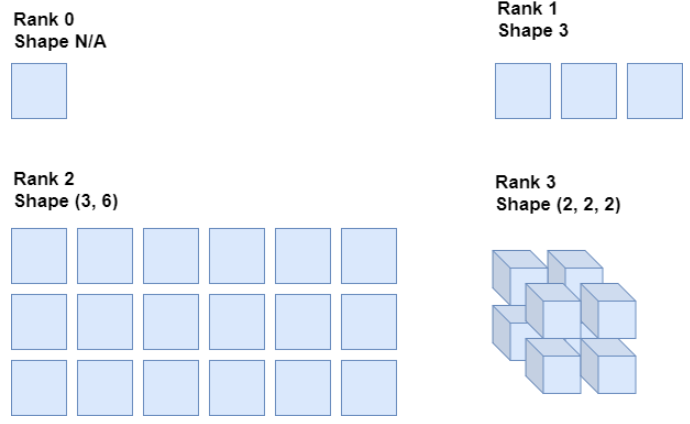

# Tensor manipulation

In [ ]:
# Tensor basic variables
c0 = tf.constant(2.7)
c1 = tf.constant([1,2,3])
c0, type(c0), c1, type(c1)

(<tf.Tensor: shape=(), dtype=float32, numpy=2.700000047683716>,
 tensorflow.python.framework.ops.EagerTensor,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>,
 tensorflow.python.framework.ops.EagerTensor)

In [ ]:
# all rank 0 (with initial values)
# 문자열은 문자 시퀀스가 아니고 단일 객체로 다루어짐.

hi = tf.Variable("Hello", tf.string)
ignition = tf.Variable(451, tf.int16)
floating = tf.Variable(3.14159265359, tf.float64)
its_complicated = tf.Variable(12.3 - 4.85j, tf.complex64)

In [ ]:
hi, type(hi), tf.rank(hi)

(<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'Hello'>,
 tensorflow.python.ops.resource_variable_ops.ResourceVariable,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>)

In [ ]:
# rank 1
mystr = tf.Variable(["Hello"], tf.string)
f_numbers  = tf.Variable([3.14159, 2.71828], tf.float32)
primes = tf.Variable([2, 3, 5, 7, 11], tf.int32)
comp = tf.Variable([12.3 - 4.85j, 7.5 - 6.23j], tf.complex128)

In [ ]:
comp.dtype, type(comp), mystr

(tf.complex128,
 tensorflow.python.ops.resource_variable_ops.ResourceVariable,
 <tf.Variable 'Variable:0' shape=(1,) dtype=string, numpy=array([b'Hello'], dtype=object)>)

In [ ]:
# rank 2
data1 = tf.Variable([1, 2], tf.int32)
data2 = tf.Variable([[1., 2.]], tf.float32)
data3 = tf.Variable([[False, True],[True, False]], tf.bool)
data4 = tf.Variable([[4, 2], [9, 3], [16, 4], [25, 5]], tf.int32)

In [ ]:
data1, data2, data3, data4, type(data4)

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([1, 2], dtype=int32)>,
 <tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[1., 2.]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=bool, numpy=
 array([[False,  True],
        [ True, False]])>,
 <tf.Variable 'Variable:0' shape=(4, 2) dtype=int32, numpy=
 array([[ 4,  2],
        [ 9,  3],
        [16,  4],
        [25,  5]], dtype=int32)>,
 tensorflow.python.ops.resource_variable_ops.ResourceVariable)

In [ ]:
data1.shape, data2.shape, data3.shape, data4.shape, type(data4.shape)

(TensorShape([2]),
 TensorShape([1, 2]),
 TensorShape([2, 2]),
 TensorShape([4, 2]),
 tensorflow.python.framework.tensor_shape.TensorShape)

In [ ]:
my_image = tf.zeros([10, 299, 299, 3])  # 4 차원 텐서: 배치 x 높이 x 너비 x 색상

In [ ]:
# rank 3 and reshaping
rank_3_tensor = tf.ones([3, 4, 5])
matrix = tf.reshape(rank_3_tensor, [6, 10])
matrixB = tf.reshape(matrix, [3, -1])
matrixAlt = tf.reshape(matrixB, [4, 3, -1])  # -1은 자동 결정하라는 뜻
# yet_another = tf.reshape(matrixAlt, [13, 2, -1])  # 에러!

In [ ]:
matrix, matrixB, matrixAlt

(<tf.Tensor: shape=(6, 10), dtype=float32, numpy=
 array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>,
 <tf.Tensor: shape=(3, 20), dtype=float32, numpy=
 array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.]], dtype=float32)>,
 <tf.Tensor: shape=(4, 3, 5), dtype=float32, numpy=
 array([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],
 
        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],
 
        [[1., 1., 1., 1

In [ ]:
f_tensor = tf.cast(tf.constant([1, 2, 3]), dtype=tf.float32)
f_tensor.dtype

tf.float32

# Exercise
- GradientTape():
  - trainable variables (created by tf.Variable or tf.compat.v1.get_variable, where trainable=True is default in both cases) are automatically watched. Tensors can be manually watched by invoking the watch method on this context manager.
  - By default GradientTape will automatically watch any trainable variables that are accessed inside the context
- 텐서플로는 자동 미분(주어진 입력 변수에 대한 연산의 그래디언트(gradient)를 계산하는 것)을 위한 tf.GradientTape API를 제공한다. tf.GradientTape는 컨텍스트(context) 안에서 실행된 모든 연산을 테이프(tape)에 "기록" 한다. 그 다음 텐서플로는 후진 방식 자동 미분(reverse mode differentiation)을 사용해 테이프에 "기록된" 연산의 그래디언트를 계산한다.

In [ ]:
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    y = x * x
    z = y * y

dz_dx = tape.gradient(z, x)  # 108.0 (4*x^3 at x = 3)
dy_dx = tape.gradient(y, x)  # 6.0
# del tape  # Drop the reference to the tape

dz_dx, dy_dx


(<tf.Tensor: shape=(), dtype=float32, numpy=108.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

In [ ]:
# Be careful when you use tape.gradient()

W = tf.Variable(4.5)

for i in range(5):
    with tf.GradientTape() as tape:
       tape.watch(W)                   # watch W
       y = W * W
       W_grad = tape.gradient(y, W)
    W = W - learning_rate * W_grad     # W will be chaned from Variable to Tensor.
                                       # so, you need to tell to watch it.
                                       # if not, tape.gradient() will return None.
print (W)

tf.Tensor(4.0676436, shape=(), dtype=float32)


In [ ]:
# zip
numbers = [1,2,3,4]
names = ['hong','gil','dong','nim']
dic = {}

for number , name in zip(numbers, names):
    dic[number] = name
print(dic)

# or
list(zip(numbers, names))

{1: 'hong', 2: 'gil', 3: 'dong', 4: 'nim'}


[(1, 'hong'), (2, 'gil'), (3, 'dong'), (4, 'nim')]

In [ ]:
z = zip(numbers, names)

In [ ]:
z

In [ ]:
next(z)   # try one at a time

(1, 'hong')

In [ ]:
[(i,j) for i,j in zip(numbers, names)]

[(1, 'hong'), (2, 'gil'), (3, 'dong'), (4, 'nim')]

In [ ]:
x = 21
y = 3
try:
    zip(x, y)
except:
    print("error: zip argument #1 must support iteration")

error: zip argument #1 must support iteration


In [ ]:
x = [21]
y = [3]
zip(x, y)

In [ ]:
t1 = tf.constant([77,88,99])
t2 = tf.Variable([77,88,99])
n1 = [1,2,3]
t1, t2

(<tf.Tensor: shape=(3,), dtype=int32, numpy=array([77, 88, 99], dtype=int32)>,
 <tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([77, 88, 99], dtype=int32)>)

In [ ]:
[(i.numpy(),j) for i, j in zip(t1,n1)]

[(np.int32(77), 1), (np.int32(88), 2), (np.int32(99), 3)]

In [ ]:
[(i.numpy(),j) for i, j in zip(t2,n1)]

[(np.int32(77), 1), (np.int32(88), 2), (np.int32(99), 3)]

- exercise

In [ ]:
a, b = 3, 4
tf.add(a, b)

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
a, b = tf.constant(3), tf.constant(4)
a + b, tf.add(a, b)

(<tf.Tensor: shape=(), dtype=int32, numpy=7>,
 <tf.Tensor: shape=(), dtype=int32, numpy=7>)